In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install dataprep

     |████████████████████████████████| 9.5 MB 6.2 MB/s 
     |████████████████████████████████| 1.1 MB 36.4 MB/s 
     |████████████████████████████████| 965 kB 32.8 MB/s 
     |████████████████████████████████| 749 kB 55.0 MB/s 
     |████████████████████████████████| 95 kB 5.4 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 43.0 MB/s 
     |████████████████████████████████| 1.5 MB 48.3 MB/s 
     |████████████████████████████████| 943 kB 53.1 MB/s 
     |████████████████████████████████| 366 kB 58.2 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 132 kB 45.6 MB/s 
     |████████████████████████████████| 10.9 MB 43.9 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 144 kB 58.5 MB/s 
     |██████

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from dataprep.eda import create_report
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/Flight-Price-Prediction-master/Flight Dataset/Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


DataPrep Report
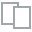
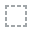
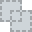
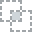
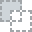
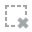
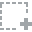
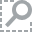
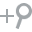
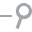
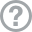
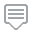
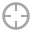
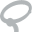
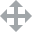
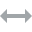
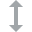
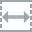
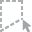
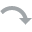
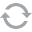
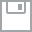
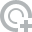
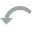
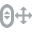
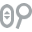
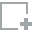
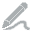
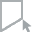
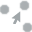
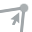
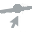

In [ ]:
create_report(train_data)

# New Section

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         10683 non-null  object 
 1   Source          10683 non-null  object 
 2   Destination     10683 non-null  object 
 3   Total_Stops     10682 non-null  float64
 4   Price           10683 non-null  int64  
 5   Journey_day     10683 non-null  int64  
 6   Journey_month   10683 non-null  int64  
 7   Dep_Hour        10683 non-null  int64  
 8   Dep_Min         10683 non-null  int64  
 9   Arrival_Hour    10683 non-null  int64  
 10  Arrival_Min     10683 non-null  int64  
 11  Duration_hours  10683 non-null  int64  
 12  Duration_mins   10683 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
train_data['Destination']

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10683, dtype: object

In [ ]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.describe(include=['object'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [ ]:

def ndelhi(d):
  if d=='New Delhi':
    return 'Delhi'
  else:
    return d
train_data['Destination']= train_data['Destination'].apply(ndelhi)
train_data['Source']= train_data['Source'].apply(ndelhi)



In [ ]:
train_data['Destination']

0           Delhi
1        Banglore
2          Cochin
3        Banglore
4           Delhi
           ...   
10678    Banglore
10679    Banglore
10680       Delhi
10681       Delhi
10682      Cochin
Name: Destination, Length: 10683, dtype: object

In [ ]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

train_data.drop('Date_of_Journey',inplace=True,axis=1)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
train_data['Dep_Hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_Min']=pd.to_datetime(train_data['Dep_Time']).dt.minute

train_data.drop('Dep_Time',inplace=True,axis=1)

train_data['Arrival_Hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_Min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

train_data.drop('Arrival_Time',axis=1,inplace=True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hour = []
duration_min = []

for i in duration:
    h,m = i.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))

    
train_data['Duration_hours'] = duration_hour
train_data['Duration_mins'] = duration_min
train_data.drop('Duration',axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


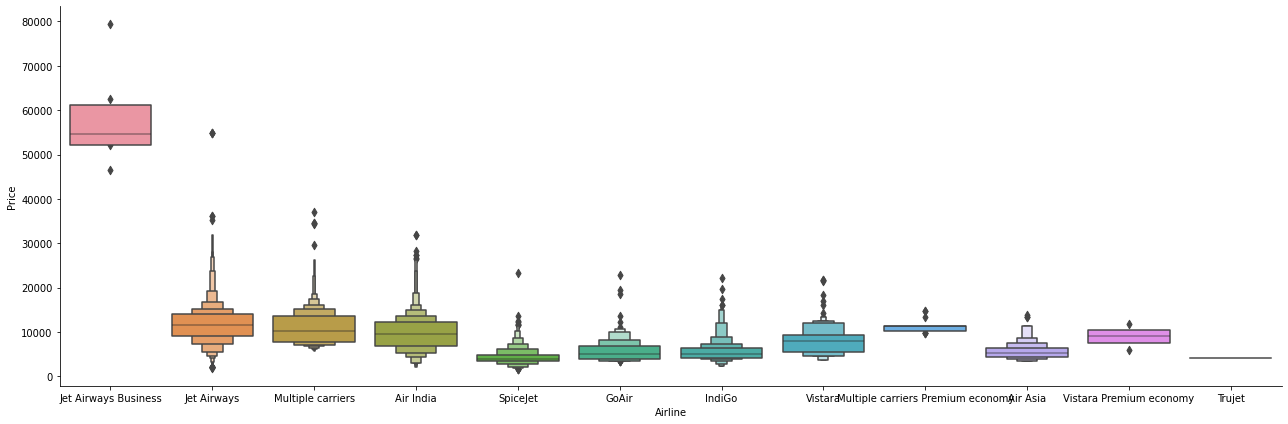

In [ ]:
sns.catplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6)

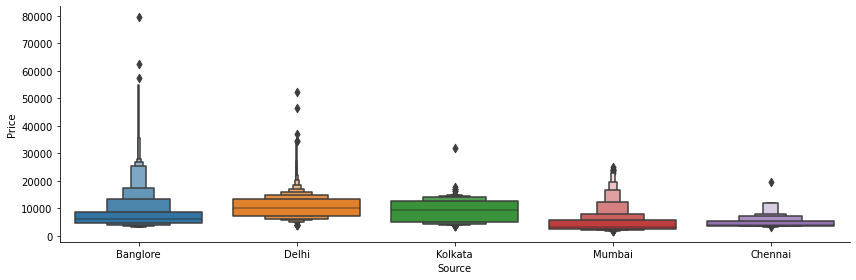

In [ ]:
sns.catplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=4)

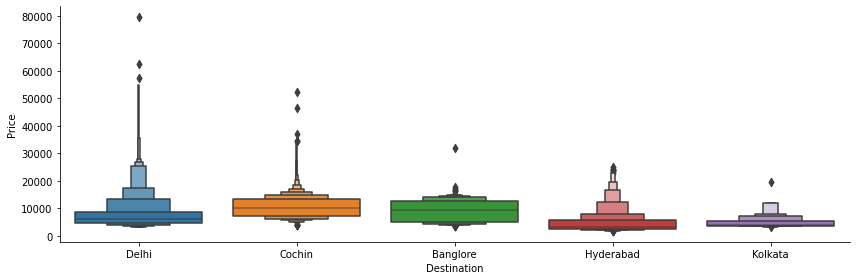

In [ ]:
sns.catplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=4)

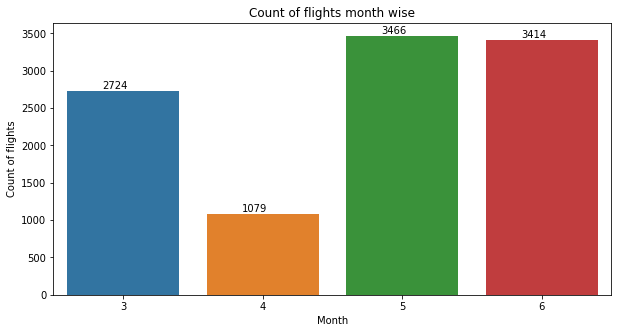

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

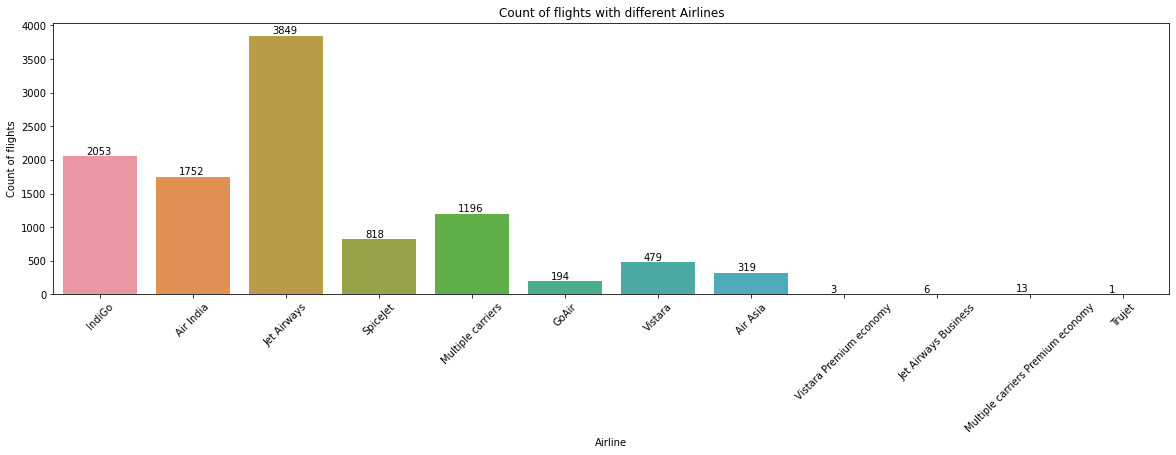

In [ ]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

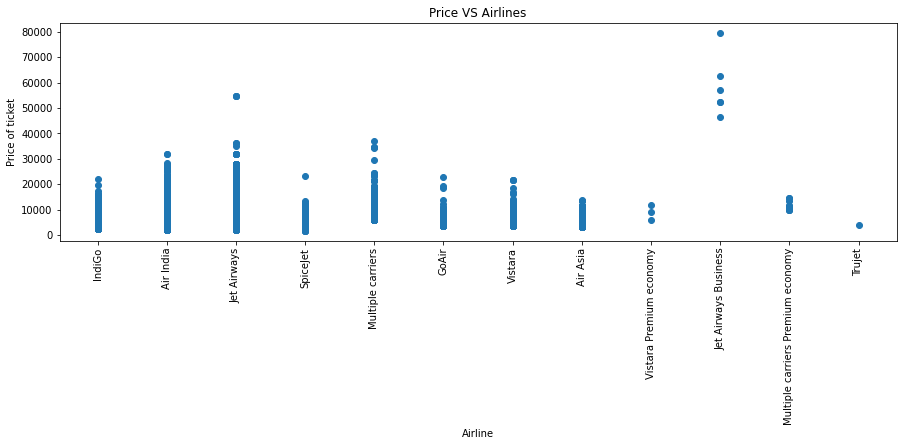

In [ ]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [ ]:
airline = train_data[['Airline']]
source = train_data[['Source']]
destination = train_data[['Destination']]
airline = pd.get_dummies(airline,drop_first=True)
source = pd.get_dummies(source,drop_first=True)
destination = pd.get_dummies(destination,drop_first=True)
airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_data.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [ ]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
train_data.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       1
Price             0
Journey_day       0
Journey_month     0
Dep_Hour          0
Dep_Min           0
Arrival_Hour      0
Arrival_Min       0
Duration_hours    0
Duration_mins     0
dtype: int64

In [ ]:
train_data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,16,50,21,35,4,45


In [ ]:
print(airline.shape)
print(source.shape)
print(destination.shape)
print(train_data.shape)

(10683, 11)
(10683, 4)
(10683, 4)
(10683, 13)


In [ ]:
data_train = pd.concat([train_data,airline,source,destination],axis=1)
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2.0,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [ ]:

data_train = data_train.dropna()
data_train.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey_day                                  0
Journey_month                                0
Dep_Hour                                     0
Dep_Min                                      0
Arrival_Hour                                 0
Arrival_Min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [ ]:
X = data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2.0,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2.0,9,6,9,25,4,25,19,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1.0,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = data_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y_train.head()

749      8040
6077     3873
2373    13377
2442     5192
5402     9968
Name: Price, dtype: int64

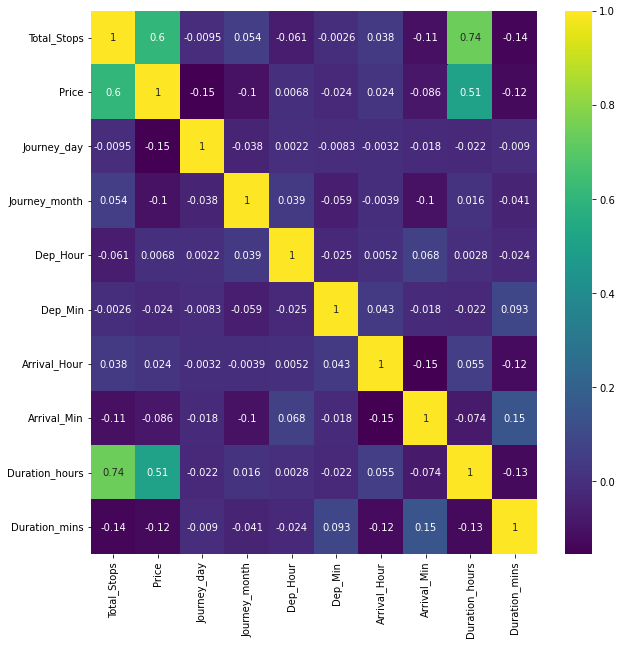

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),cmap='viridis',annot=True)

In [ ]:
reg = ExtraTreesRegressor()
reg.fit(X,y)

print(reg.feature_importances_)

[2.29788012e-01 1.41256907e-01 5.92051773e-02 2.42538249e-02
 2.13602185e-02 2.80267822e-02 1.97874621e-02 1.28796329e-01
 1.82947984e-02 1.02842313e-02 1.95844876e-03 1.71861022e-02
 1.34869807e-01 6.77117154e-02 2.19196693e-02 8.48611133e-04
 4.83866282e-03 7.35847428e-05 4.62715368e-03 7.02746907e-05
 7.64112655e-04 1.27988103e-02 4.65710838e-03 8.73393503e-03
 8.94021997e-03 1.90474255e-02 9.25337800e-03 6.47237457e-04]


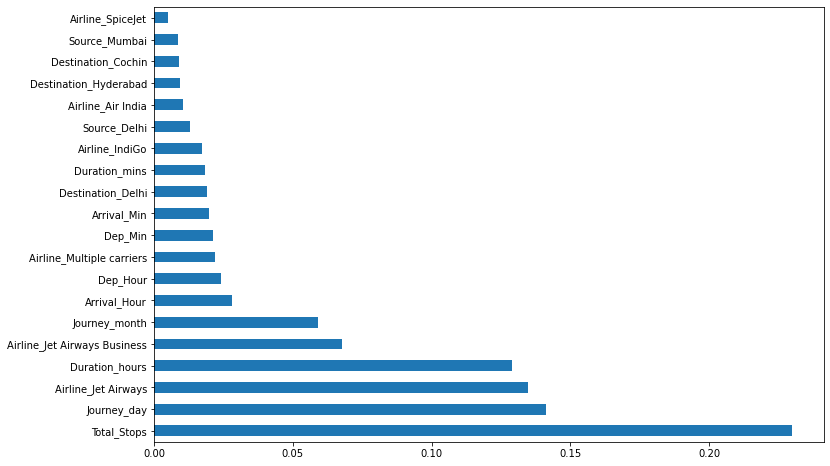

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
et_pred = reg.predict(X_test)
et_pred

array([16655.,  4959.,  9187., ...,  5000.,  3100.,  6734.])

In [ ]:
print('r2 score: ', metrics.r2_score(y_test,et_pred))

r2 score:  0.9635860347316709


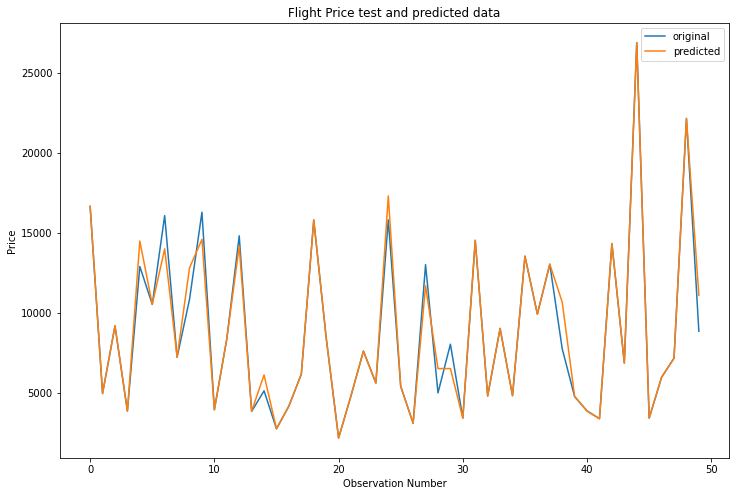

In [ ]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(12,8))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, et_pred[:number_of_observations], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [ ]:
X_test

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
6075,2.0,21,5,15,5,1,30,10,25,0,...,0,0,0,1,0,0,1,0,0,0
3544,1.0,3,6,10,35,19,35,9,0,0,...,0,0,0,1,0,0,1,0,0,0
9291,1.0,9,5,20,20,9,5,12,45,0,...,1,0,0,0,1,0,0,0,0,0
5032,0.0,24,5,14,45,17,5,2,20,0,...,0,0,1,0,0,0,0,0,0,1
2483,1.0,21,5,22,50,4,25,5,35,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,2.0,1,6,20,0,4,25,8,25,0,...,0,0,0,1,0,0,1,0,0,0
5858,1.0,9,6,16,30,23,35,7,5,0,...,0,0,0,0,1,0,0,0,0,0
2689,0.0,12,5,14,25,17,40,3,15,0,...,0,0,0,1,0,0,1,0,0,0
4486,0.0,9,5,21,5,22,25,1,20,1,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
prediction = rf_random.predict(X_test)
prediction = pd.Series(prediction)
prediction

0       17101.904536
1        5638.628474
2        8668.149699
3        3650.253474
4       14696.344686
            ...     
3200    14411.729894
3201    12686.243311
3202     5736.242218
3203     3095.619442
3204     7213.895531
Length: 3205, dtype: float64

In [ ]:
y_test

6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
        ...  
7917    16263
5858    10844
2689     5000
4486     3100
7877     6734
Name: Price, Length: 3205, dtype: int64

<Figure size 576x576 with 0 Axes>

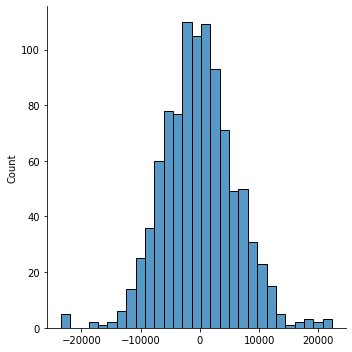

In [ ]:
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()

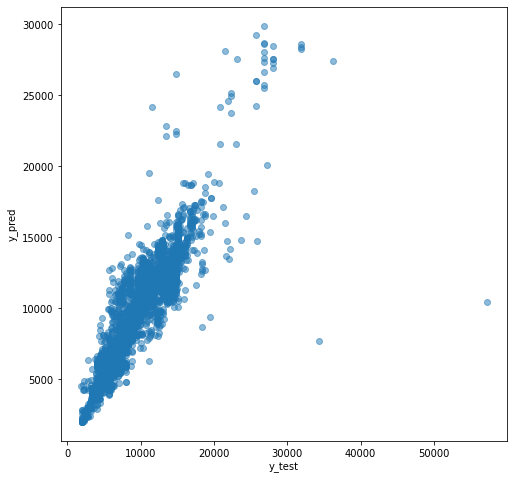

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('r2 score: ', metrics.r2_score(y_test,prediction))
y_test

r2 score:  0.814151323180881


6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
        ...  
7917    16263
5858    10844
2689     5000
4486     3100
7877     6734
Name: Price, Length: 3205, dtype: int64

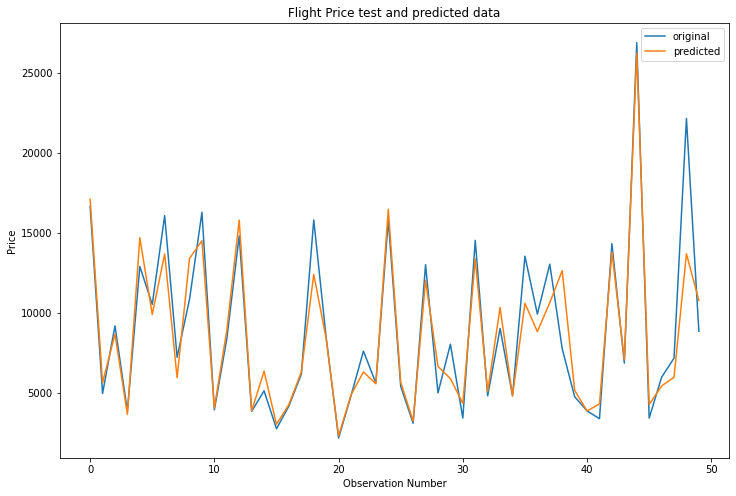

In [ ]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(12,8))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, prediction[:number_of_observations], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

In [ ]:
user_input = pd.read_excel('/content/drive/MyDrive/Flight-Price-Prediction-master/Flight Dataset/User_Input.xlsx')
user_input.head()


In [ ]:
user_input['Journey_day'] = pd.to_datetime(user_input['Date_of_Journey'],format='%d/%m/%Y').dt.day
user_input['Journey_month'] = pd.to_datetime(user_input['Date_of_Journey'],format='%d/%m/%Y').dt.month

user_input.drop('Date_of_Journey',inplace=True,axis=1)
user_input.head()

In [ ]:
user_input['Dep_Hour']=pd.to_datetime(user_input['Dep_Time']).dt.hour
user_input['Dep_Min']=pd.to_datetime(user_input['Dep_Time']).dt.minute

user_input.drop('Dep_Time',inplace=True,axis=1)

user_input['Arrival_Hour']=pd.to_datetime(user_input['Arrival_Time']).dt.hour
user_input['Arrival_Min']=pd.to_datetime(user_input['Arrival_Time']).dt.minute

user_input.drop('Arrival_Time',axis=1,inplace=True)

user_input.head()

In [ ]:
duration = list(user_input['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hour = []
duration_min = []

for i in duration:
    h,m = i.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))

    
user_input['Duration_hours'] = duration_hour
user_input['Duration_mins'] = duration_min
user_input.drop('Duration',axis=1,inplace=True)
user_input.head()

In [ ]:
airline = user_input[['Airline']]
source = user_input[['Source']]
destination = user_input[['Destination']]
airline = pd.get_dummies(airline,drop_first=True)
source = pd.get_dummies(source,drop_first=True)
destination = pd.get_dummies(destination,drop_first=True)
source


In [ ]:
user_input.drop(['Route','Additional_Info'],inplace=True,axis=1)


In [ ]:
user_input['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
user_input.head()


In [ ]:
user_input = pd.concat([user_input,airline,source,destination],axis=1)
user_input.drop(['Airline','Source','Destination'],axis=1,inplace=True)
user_input.head()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.array.reshape(-1, 1))
y_test = scaler_y.transform(y_test.array.reshape(-1, 1))

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras

ANN_model = keras.Sequential()
ANN_model.add(Dense(32, input_dim = 28))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(32))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.25))
ANN_model.add(Dense(128))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(128))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))         
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                928       
                                                                 
 activation_22 (Activation)  (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 activation_23 (Activation)  (None, 32)                0         
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 128)               4224      
                                                                 
 activation_24 (Activation)  (None, 128)              

In [ ]:
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [ ]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 120, batch_size = 20, validation_split = 0.2)

Epoch 1/120
300/300 [==============================] - 1s 3ms/step - loss: 0.1509 - val_loss: 6.9445
Epoch 2/120
300/300 [==============================] - 1s 2ms/step - loss: 0.1623 - val_loss: 7.6134
Epoch 3/120
300/300 [==============================] - 1s 3ms/step - loss: 0.1784 - val_loss: 6.1095
Epoch 4/120
300/300 [==============================] - 1s 2ms/step - loss: 0.1593 - val_loss: 4.8559
Epoch 5/120
300/300 [==============================] - 1s 3ms/step - loss: 0.1570 - val_loss: 4.9511
Epoch 6/120
300/300 [==============================] - 2s 5ms/step - loss: 0.1595 - val_loss: 4.1683
Epoch 7/120
300/300 [==============================] - 1s 5ms/step - loss: 0.1673 - val_loss: 4.5149
Epoch 8/120
300/300 [==============================] - 1s 2ms/step - loss: 0.1483 - val_loss: 5.5740
Epoch 9/120
300/300 [==============================] - 1s 2ms/step - loss: 0.1588 - val_loss: 8.6996
Epoch 10/120
300/300 [==============================] - 1s 3ms/step - loss: 0.1521 - val_lo

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

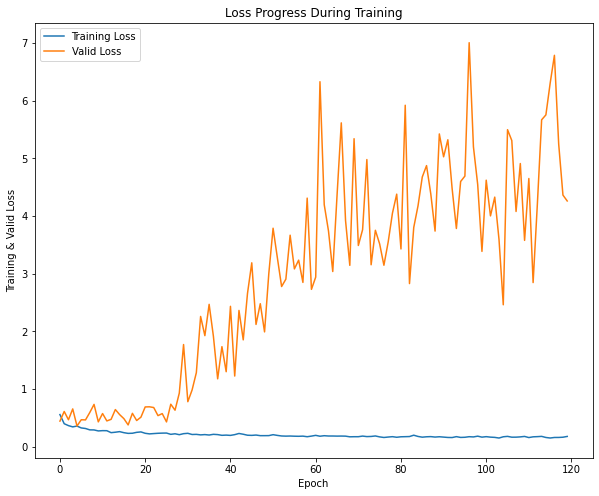

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training & Valid Loss')
plt.legend(['Training Loss','Valid Loss'])

Text(0, 0.5, 'True Values')

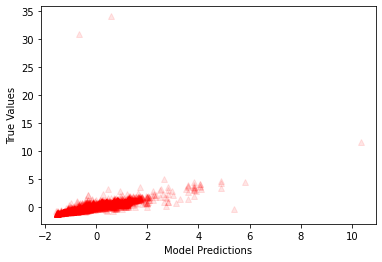

In [ ]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r', alpha = 0.1)
plt.xlabel('Model Predictions')
plt.ylabel('True Values')